## A Brief Examination of World Religious Freedom 

The goal of this notebook is to perform a brief exploratory analysis of the human freedom index dataset, particularly with regards to religious freedom. We will begin by briefly looking at overall human freedom around the world, and then dive a little bit deeper into the trends in religious freedom. We will set out to answer some basic questions:
1. How has world religious freedom varied over the 2008-2016 period?
2. How is religious freedom connected to overall human freedom?
3. How are government restrictions on religious freedom related to religious harassment?
4. What countries represent the best and worst in terms of religious freedom, and how have those fluctuated in most recent times (2015-2016)?

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 
sns.set()
%matplotlib inline

In [6]:
# Read in data and view the first 5 rows
hfi_data = pd.read_csv('hfi_cc_2018.csv')
hfi_data = hfi_data[hfi_data['ISO_code'] != 'BRN'] # We drop this country as it does not contain pf_religion data
hfi_data.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [7]:
# Define function for plotting yearly median for given metrics with std_dev error bars
def plot_med_year(df, metric, title=None):
    df_year = df.groupby('year')
    df_med = pd.merge(df_year[metric].median().to_frame().reset_index(), 
                  df_year[metric].std().to_frame(name='std').reset_index())
    plt.figure()
    plt.errorbar(x=df_med['year'], y=df_med[metric], 
                 yerr=df_med['std'], linestyle='None', marker='s')
    if title:
        plt.title(title)
    else:
        plt.title('Median {} by Year'.format(metric))

### Overall Freedom
Here, we will view the overall changes in average world freedom for the time period contained in the datset (2008-2016). In particular, we will view the trends in overall human freedom and in personal freedom. While the human freedom score is made up of an average of personal freedom and economic freedom, we will not be analyzing economic freedom as our interest is primairly in religious freedom (a sub-category of personal freedom).

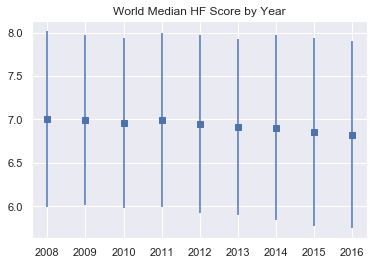

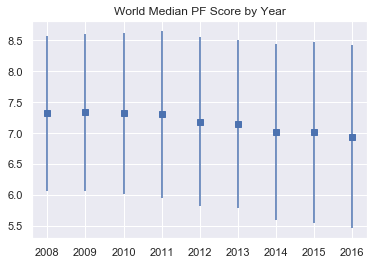

In [8]:
# Plot World Average hfi by year
plot_med_year(hfi_data, 'hf_score', 'World Median HF Score by Year')
# Plot World Average personal freedom by year
plot_med_year(hfi_data, 'pf_score', 'World Median PF Score by Year')

The above graphs show a downward trend in both personal and overall human freedom from 2008 to 2016. Let's break these scores down further by world region. 

Text(0.5, 1.0, 'Median Yearly pf_score by Region')

<Figure size 432x288 with 0 Axes>

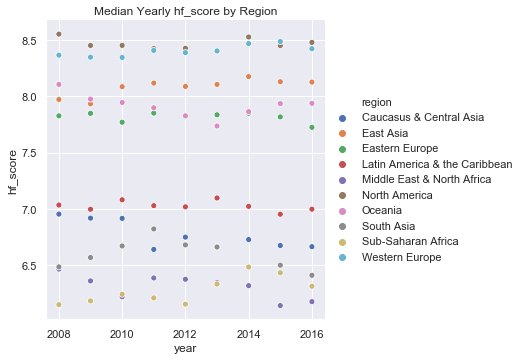

<Figure size 432x288 with 0 Axes>

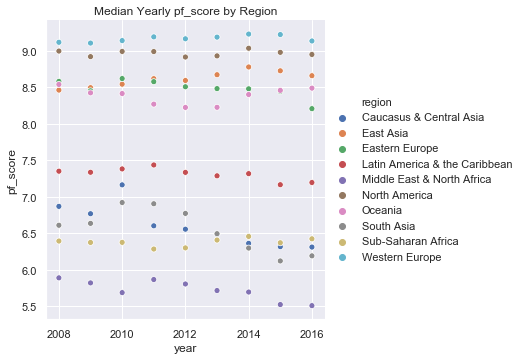

In [9]:
# Explore yearly regional metrics in human freedom, personal freedom, and religious freedom
# Other religion related metrics are excluded as many have missing data
region_yr = hfi_data.groupby(['region', 'year']).median().reset_index()

# Plot human freedom by region
plt.figure()
sns.relplot(x='year', y='hf_score', hue='region', data=region_yr)
plt.title('Median Yearly hf_score by Region')

#Plot personal freeodm by region
plt.figure()
sns.relplot(x='year', y='pf_score', hue='region', data=region_yr)
plt.title('Median Yearly pf_score by Region')

Not surprisingly, North America and Western Europe consistently exhibit the highest scores for personal and overall human freedom. What is more surprising from these visualizations is the large spread in human and personal freedom between the five highest reigons and the five lowest regions in the world. These groups are spread by nearly a full point or more in both the personal and human freedom scores. Let's dive deeper into the sub-category of interest here - religious freedom, and see if similar trends exist in religious freedom. 

### Religious Freedom

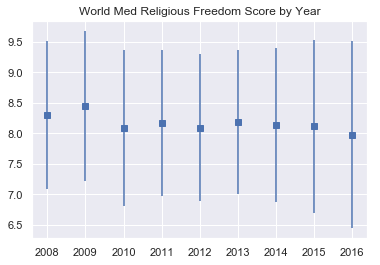

In [10]:
# Plot World Median religious freedom score by year
plot_med_year(hfi_data, 'pf_religion', 'World Med Religious Freedom Score by Year')

Religious freedom exhibits an overall downard trend over the 2008 to 2016 period, similar to those of personal and human freedom, albeit with more fluctuation. Next, we will explore the regional breakdown of religious freedom over this period. 

Text(0.5, 1.0, 'Median Yearly pf_religion Score by Region')

<Figure size 432x288 with 0 Axes>

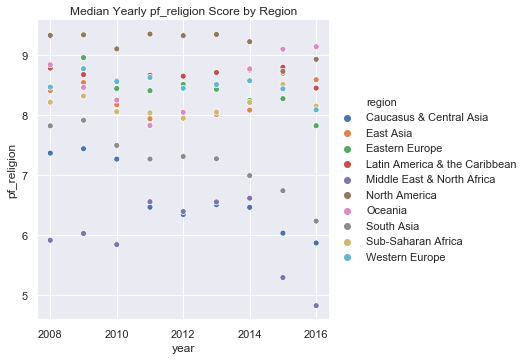

In [11]:
#Plot religious freedom by region
plt.figure()
sns.relplot(x='year', y='pf_religion', hue='region', data=region_yr)
plt.title('Median Yearly pf_religion Score by Region')

From this regional breakdown, it is clear that there has been more significant variance in religious freedom for each region over 2008-2016 than there has been for overall personal or human freedom. Additionally, while Western Europe has generally ranked very highly in personal and human freedom, it ranks in the middle for religious freedom. Let's look further into the overall and regional medians for government religious restrictions and religious harassment. 

Text(0.5, 1.0, 'Median Yearly pf_religion_harassment Score by Region')

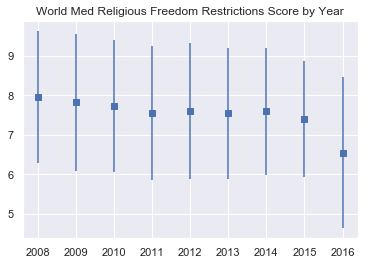

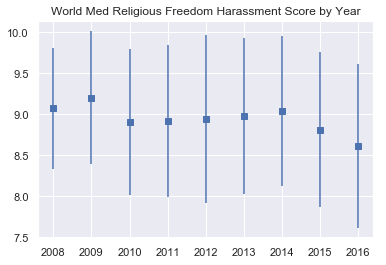

<Figure size 432x288 with 0 Axes>

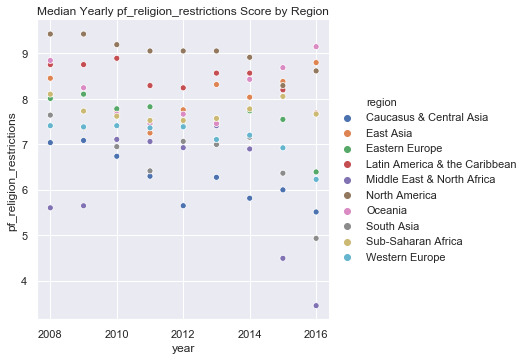

<Figure size 432x288 with 0 Axes>

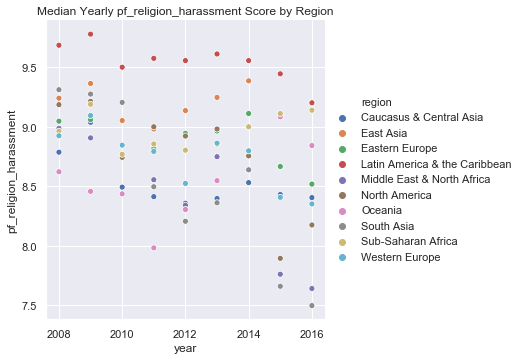

In [12]:
#Plot religious freeodm - restrictions
plot_med_year(hfi_data, 'pf_religion_restrictions', 'World Med Religious Freedom Restrictions Score by Year')
#Plot religious freeodm - harassment 
plot_med_year(hfi_data, 'pf_religion_harassment', 'World Med Religious Freedom Harassment Score by Year')
#Plot religious freeodm - restrictions by region
plt.figure()
sns.relplot(x='year', y='pf_religion_restrictions', hue='region', data=region_yr)
plt.title('Median Yearly pf_religion_restrictions Score by Region')
#Plot religious freeodm - harassment by region
plt.figure()
sns.relplot(x='year', y='pf_religion_harassment', hue='region', data=region_yr)
plt.title('Median Yearly pf_religion_harassment Score by Region')

Western Europe is again low in both sub-categories of religious freedom. There is also an interesting and somewhat surprising downward trend for North America, particularly from 2014-2016. To get a better understanding of how these metrics relate to each other and to overall religious, personal, and human freedom, we will view the correlation matrix.  

In [13]:
# First, we will create a data frame containing only the metrics of interest
religion = hfi_data[['countries', 'region', 'year', 'pf_religion_harassment','pf_religion_restrictions', 
                     'pf_religion', 'pf_score', 'hf_score']]

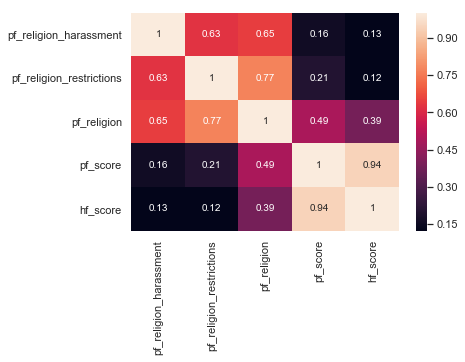

In [14]:
# Next, we create a heat map of the correlation matrix
plt.figure()
sns.heatmap(religion.drop(columns='year').corr(), annot=True)

Not surprisingly given the trends observed above, around the world there is a high degree of correlation between government restrictions on religious freedom and the presence of religious harassment. Additionally, there is a somewhat strong correlation (.49) between pf_religion and overall pf_score. Somewhat surprisingly however, the correlation between pf_religion and overall hf_score is only .39. Thus, it exhbits a somewhat strong but not overwhelmingly strong correlation. Let's view these metrics another way to get a better sense for how they relate.    

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

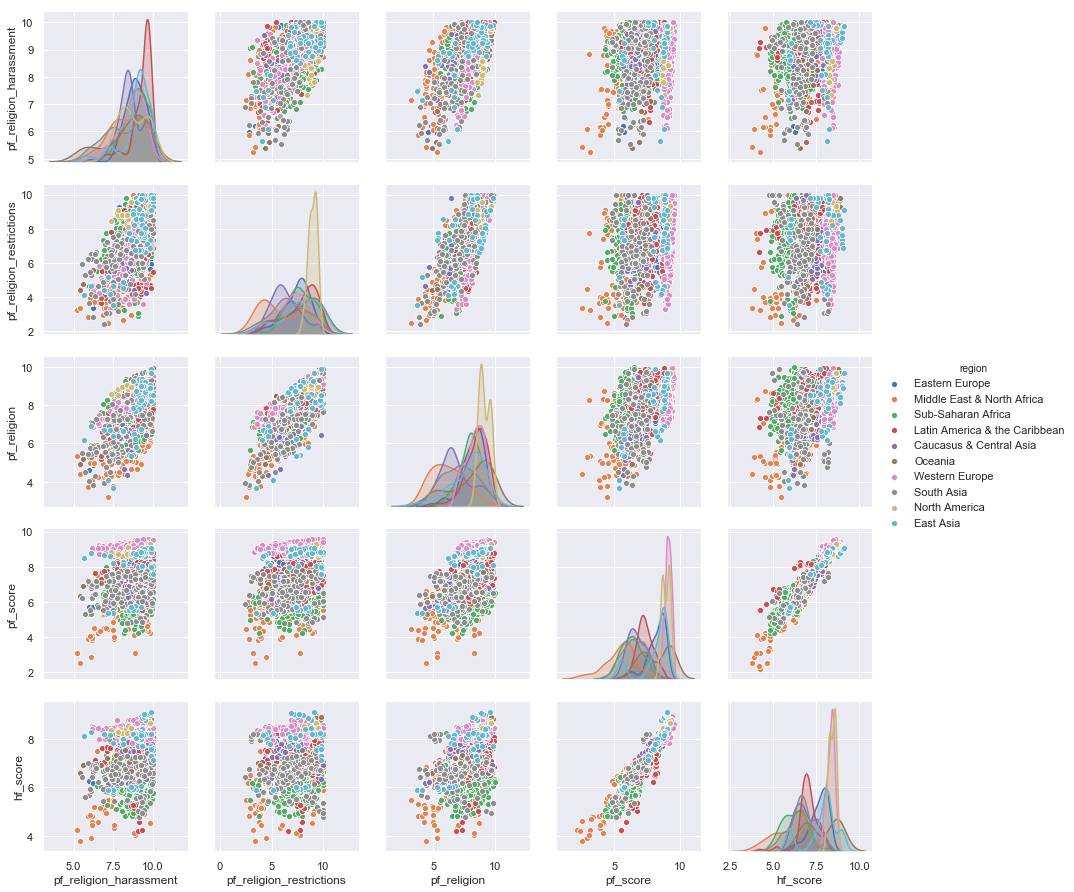

In [15]:
# Create a scatter matrix to view correlation at a more granular level
plt.figure()
sns.pairplot(religion.drop(columns='year'), hue='region')

The above scatter matrix allows us to visualize the correlation between each of the key metrics in a more granular way. This allows us to see what the correlaiton matrix already told us, that pf_religion is only mildly correlated with hf_score, but that govrnment restrictions of religion and religious harassment are more strongly correlated. 

Next, we will examine religious freedom at an even more granular level, and look at the world's 5 best and 5 worst countries in terms of religious freedom for 2015 and 2016.

In [16]:
# Create new df for these years only
years = [2015, 2016]
religion_15_16 = religion[religion['year'].isin(years)]

In [63]:
# Bottom 5 - 2015
religion_15_16[religion_15_16['year'] == 2015].nsmallest(n=5, columns='pf_religion')

,countries,region,year,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_score,hf_score
287,Saudi Arabia,Middle East & North Africa,2015,7.511111,3.888889,3.800000,4.404408,5.322204
206,Egypt,Middle East & North Africa,2015,6.166667,3.655556,4.107407,3.852272,4.811136
194,China,East Asia,2015,7.140000,5.183333,4.107778,5.374700,5.882350
230,Iran,Middle East & North Africa,2015,7.011111,3.377778,4.296296,4.492074,4.946037
229,Indonesia,South Asia,2015,6.344444,4.072222,4.305556,6.428120,6.714060


From here, we see that the five lowest countries for pf_religion also have very low scores for religious restrictions, but moderate scores for religious harassment. Let's see if anything changed from 2015 to 2016. 

In [62]:
# Bottom 5 - 2016
religion_15_16[religion_15_16['year'] == 2016].nsmallest(n=5, columns='pf_religion')

,countries,region,year,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_score,hf_score
125,Saudi Arabia,Middle East & North Africa,2016,7.144444,2.500000,3.214815,4.438732,5.479366
32,China,East Asia,2016,7.482222,3.516667,3.666296,5.350820,5.905410
44,Egypt,Middle East & North Africa,2016,5.877778,2.822222,3.733333,3.894554,4.807277
67,Indonesia,South Asia,2016,6.240000,2.822222,3.854074,6.381312,6.770656
92,Malaysia,South Asia,2016,6.884444,2.405556,3.930000,5.902980,6.411490


Interestingly, Iran is no longer in the bottom 5 for religious freedom in 2016, but Malaysia now is. The other four countries remain the same, albeit in a different order. Additionally, the scores in government restrictions in the bottom 5 all decreased from 2015-2016. This is not surprising given the overall world downward trend in restrictions scores from 2015 to 2016. Let's see if there is a similar trend amongst the 5 best countries in the world with regards to religious freedom.  

In [61]:
# Top 5 - 2015
religion_15_16[religion_15_16['year'] == 2015].nlargest(n=5, columns='pf_religion')

,countries,region,year,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_score,hf_score
177,Benin,Sub-Saharan Africa,2015,10.000000,9.633333,9.877778,7.581713,6.680857
269,New Zealand,Oceania,2015,9.666667,9.677778,9.781481,9.273780,8.876890
282,Portugal,Western Europe,2015,9.888889,8.794444,9.561111,9.041336,8.295668
235,Jamaica,Latin America & the Caribbean,2015,9.622222,8.844444,9.488889,7.236812,7.243406
288,Senegal,Sub-Saharan Africa,2015,9.788889,8.333333,9.374074,6.842267,6.496134


In [60]:
# Top 5 - 2016
religion_15_16[religion_15_16['year'] == 2016].nlargest(n=5, columns='pf_religion')

,countries,region,year,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_score,hf_score
59,Guinea-Bissau,Sub-Saharan Africa,2016,9.888889,9.816667,9.852778,6.859722,6.054861
107,New Zealand,Oceania,2016,9.333333,9.861111,9.731481,9.284819,8.887410
137,Suriname,Latin America & the Caribbean,2016,9.666667,9.305556,9.486111,7.788563,7.074282
37,Cote d'Ivoire,Sub-Saharan Africa,2016,9.444444,8.888889,9.444444,7.062542,6.531271
120,Portugal,Western Europe,2016,9.482222,8.794444,9.425556,9.043712,8.276856


Unlike the lowest countries for religious freedom, there is a higher degree of variance amongst the countries included in the top 5. Additionally, the countries in the top 5 do not seem to exhibit the same downward trend in government restrictions that the world in general, and the bottom 5 in particular, exhibit. Of course, this is not a perfect comparison given the changes in the countries included in the top 5, but for our brief analysis, it is still helpful. Lastly, it is interesting to note that there is slightly more regional variation amongst the top 5 countries than amongst the bottom 5. 

#### Conclusion

Thus, we have briefly answered the basic questions we set out to answer at the beginning of this analysis. While we have not gone too in depth, the analysis has shown us that there is a correlation between high levels of government restrictions on religion and religious harassment. Additionally, one somewhat surprising finding was the downward trend in government religious restrictions scores in Western Europe. We will end this analysis with three geographic visualizations which show how religious freedom scores are distributed around the globe.

In [22]:
%%html
<div class='tableauPlaceholder' id='viz1548565321797' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;hf&#47;hfi_analysis_v1&#47;RelFreedom&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='hfi_analysis_v1&#47;RelFreedom' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;hf&#47;hfi_analysis_v1&#47;RelFreedom&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1548565321797');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [23]:
%%html
<div class='tableauPlaceholder' id='viz1548565707738' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;hf&#47;hfi_analysis_v1&#47;RelRestrictions&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='hfi_analysis_v1&#47;RelRestrictions' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;hf&#47;hfi_analysis_v1&#47;RelRestrictions&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1548565707738');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [24]:
%%html
<div class='tableauPlaceholder' id='viz1548565668582' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;hf&#47;hfi_analysis_v1&#47;RelHarassment&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='hfi_analysis_v1&#47;RelHarassment' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;hf&#47;hfi_analysis_v1&#47;RelHarassment&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1548565668582');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>